# Financial Fraud Detection

In [34]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the data
fraud_data = pd.read_csv("fraud.csv")

# Loop through columns in fraud_data
for column in fraud_data.columns:
    if fraud_data[column].dtype == 'float64':
        mean_val = fraud_data[column].mean()
        median_val = fraud_data[column].median()
        skewness = fraud_data[column].skew()
        
        # Use assignment instead of inplace=True to avoid potential chained assignments
        if abs(skewness) < 0.5:
            fraud_data[column] = fraud_data[column].fillna(mean_val)
        else:
            fraud_data[column] = fraud_data[column].fillna(median_val)
    elif fraud_data[column].dtype == 'object':
        mode_val = fraud_data[column].mode()[0]
        fraud_data[column] = fraud_data[column].fillna(mode_val)

# Store the cleaned data in a new variable
cleaned_fraud_data = fraud_data

# Print the cleaned data
data=cleaned_fraud_data
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


### Verifying whether the dataset is balanced or not

In [35]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the data
fraud_data = pd.read_csv("fraud.csv")

# Loop through columns in fraud_data
for column in fraud_data.columns:
    if fraud_data[column].dtype == 'float64':
        mean_val = fraud_data[column].mean()
        median_val = fraud_data[column].median()
        skewness = fraud_data[column].skew()
        
        # Use assignment instead of inplace=True to avoid potential chained assignments
        if abs(skewness) < 0.5:
            fraud_data[column] = fraud_data[column].fillna(mean_val)
        else:
            fraud_data[column] = fraud_data[column].fillna(median_val)
    elif fraud_data[column].dtype == 'object':
        mode_val = fraud_data[column].mode()[0]
        fraud_data[column] = fraud_data[column].fillna(mode_val)

# Store the cleaned data in a new variable
cleaned_fraud_data = fraud_data

# Print the cleaned data
print(cleaned_fraud_data)

data=cleaned_fraud_data

# Define the target column
target_column = 'is_Fraud'

# Check the distribution of the target column
class_distribution = fraud_data['isFraud'].value_counts()

# Display class distribution
print(f"Class Distribution:\n{class_distribution}")

# Check if the dataset is balanced or not
majority_class = class_distribution.idxmax()
minority_class = class_distribution.idxmin()

print(f"\nThe majority class is: {majority_class}")
print(f"The minority class is: {minority_class}")

# If the dataset is balanced, the difference between the majority and minority class will be small
if class_distribution[majority_class] / class_distribution[minority_class] > 2:
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")

         step      type     amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT    9839.64  C1231006815      170136.00   
1           1   PAYMENT    1864.28  C1666544295       21249.00   
2           1  TRANSFER     181.00  C1305486145         181.00   
3           1  CASH_OUT     181.00   C840083671         181.00   
4           1   PAYMENT   11668.14  C2048537720       41554.00   
...       ...       ...        ...          ...            ...   
1048570    95  CASH_OUT  132557.35  C1179511630      479803.00   
1048571    95   PAYMENT    9917.36  C1956161225       90545.00   
1048572    95   PAYMENT   14140.05  C2037964975       20545.00   
1048573    95   PAYMENT   10020.05  C1633237354       90605.00   
1048574    95   PAYMENT   11450.03  C1264356443       80584.95   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225         

###  Splitting into Training and Testing Dataset

In [36]:
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
total_test_points = X_test.shape[0]

# Total number of data points in the entire dataset (before splitting)
total_data_points = data.shape[0]

# Calculate percentage of data points in the test set
test_percentage = (total_test_points / total_data_points) * 100

# Display the result
print(f"Total Data Points in Test Set: {total_test_points}")
print(f"Total Data Points in Entire Dataset: {total_data_points}")
print(f"Percentage of Test Set Data Points: {test_percentage:.2f}%")

Total Data Points in Test Set: 314573
Total Data Points in Entire Dataset: 1048575
Percentage of Test Set Data Points: 30.00%


In [37]:
# Total number of data points in the training set
total_train_points = X_train.shape[0]

# Total number of data points in the entire dataset (before splitting)
total_data_points = data.shape[0]

# Calculate percentage of data points in the training set
train_percentage = (total_train_points / total_data_points) * 100

# Display the result
print(f"Total Data Points in Training Set: {total_train_points}")
print(f"Total Data Points in Entire Dataset: {total_data_points}")
print(f"Percentage of Training Set Data Points: {train_percentage:.2f}%")

Total Data Points in Training Set: 734002
Total Data Points in Entire Dataset: 1048575
Percentage of Training Set Data Points: 70.00%


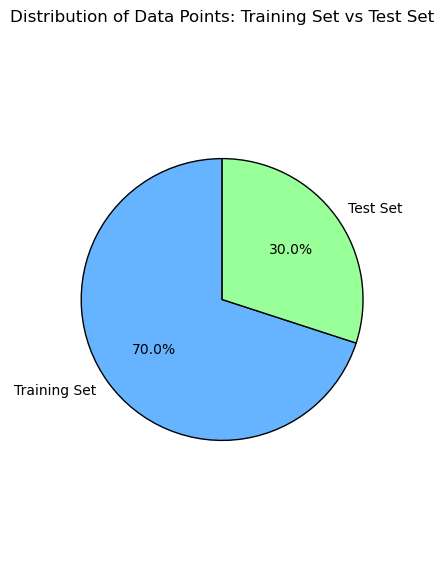

In [38]:
import matplotlib.pyplot as plt

# Total number of data points in the training set
total_train_points = X_train.shape[0]

# Total number of data points in the entire dataset (before splitting)
total_data_points = data.shape[0]

# Calculate percentage of data points in the training set
train_percentage = (total_train_points / total_data_points) * 100

# Data for plotting
labels = ['Training Set', 'Test Set']
sizes = [train_percentage, 100 - train_percentage]
colors = ['#66b3ff', '#99ff99']
# Plotting the pie chart
plt.figure(figsize=(4, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Data Points: Training Set vs Test Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

###  ML Model Building 

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Drop IDs or non-numeric features that don't help (like names)
# data = data.drop(['nameOrig', 'nameDest'], axis=1)

# # One-hot encode 'type'
# data = pd.get_dummies(data, columns=['type'], drop_first=True)
# X = data.drop('isFraud', axis=1)
# y = data['isFraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # 'balanced' handles class imbalance
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[[296389  17841]
 [    24    319]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    314230
           1       0.02      0.93      0.03       343

    accuracy                           0.94    314573
   macro avg       0.51      0.94      0.50    314573
weighted avg       1.00      0.94      0.97    314573

ROC-AUC Score: 0.9846440496084232


### LOGISTIC REGRESSION

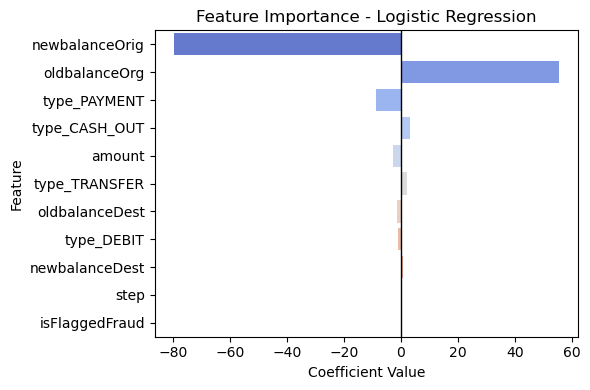

In [47]:
import seaborn as sns

# Plot Feature Importance
coefficients = model.coef_[0]  # Coefficients from Logistic Regression
feature_names = X.columns  # After one-hot encoding

# Create DataFrame for visualization
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add absolute values for sorting
feat_df['Importance'] = feat_df['Coefficient'].abs()

# Sort by importance
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot the Feature Importance
plt.figure(figsize=(6, 4))
sns.barplot(data=feat_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()

### RANDOM FOREST

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Load the dataset
data = pd.read_csv("fraud.csv")

# 2. Drop ID columns if present
for col in ['nameOrig', 'nameDest']:
    if col in data.columns:
        data.drop(columns=col, inplace=True)

# 3. One-hot encode 'type' column if present
if 'type' in data.columns:
    data = pd.get_dummies(data, columns=['type'], drop_first=True)

# 4. Split features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# 5. Scale the features (optional for tree models, but okay)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# 7. Train Random Forest Classifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # handle class imbalance
)
model.fit(X_train, y_train)

# 8. Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# 9. Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[[314228      2]
 [    80    263]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.99      0.77      0.87       343

    accuracy                           1.00    314573
   macro avg       1.00      0.88      0.93    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score: 0.979256410853538


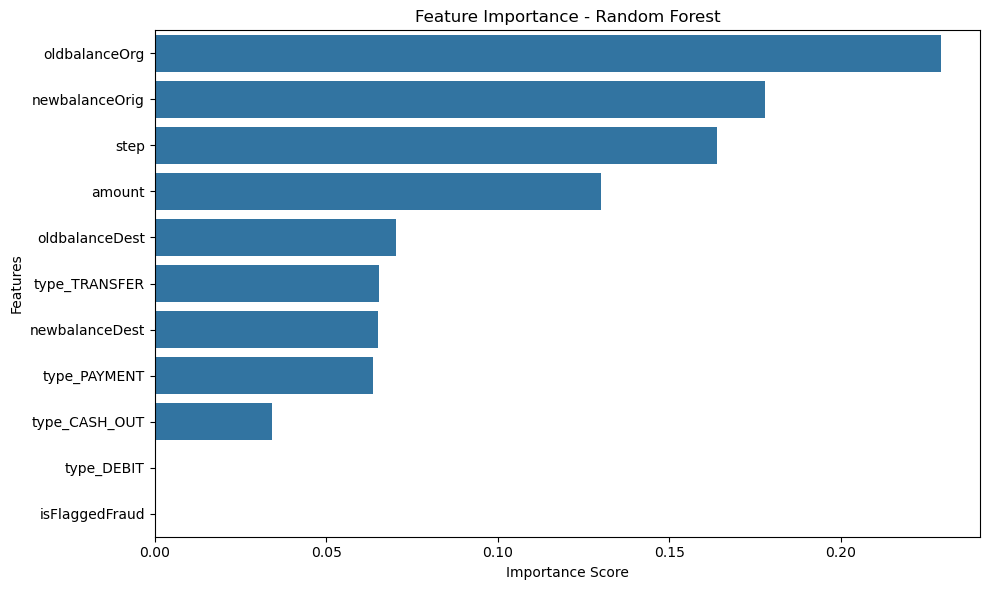

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming rf is your trained RandomForest model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

### KNN

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("fraud.csv")

# Data Preprocessing
# Drop non-numeric features or features that are not useful
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# One-hot encoding for 'type' column
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Features (X) and Target (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Standardize the features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Initialize KNN Classifier
# Choose the number of neighbors (k) - we will use 5 here
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Predict the labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation: Confusion Matrix, Classification Report, and ROC-AUC Score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

[[314229      1]
 [   162    181]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.99      0.53      0.69       343

    accuracy                           1.00    314573
   macro avg       1.00      0.76      0.84    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score: 0.849629247819349


### XGBOST

[[314223      7]
 [    56    287]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.98      0.84      0.90       343

    accuracy                           1.00    314573
   macro avg       0.99      0.92      0.95    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score: 0.9977781821990893


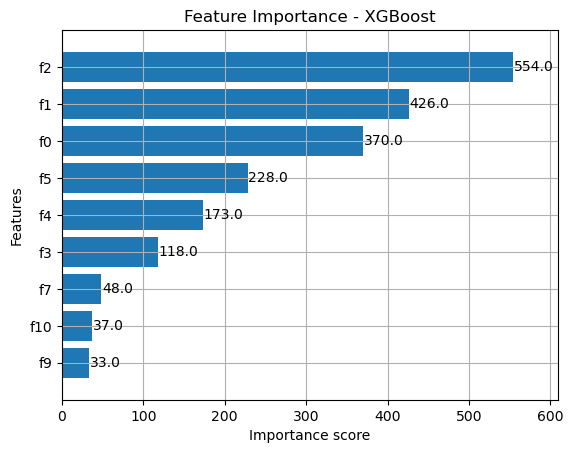

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("fraud.csv")

# Data Preprocessing
# Drop non-numeric features or features that are not useful
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# One-hot encoding for 'type' column
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Features (X) and Target (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Standardize the features (important for XGBoost, even though it is not sensitive to scaling, it's generally better)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Initialize XGBoost Classifier
model = xgb.XGBClassifier(
    max_depth=6,  # Maximum depth of a tree
    n_estimators=100,  # Number of trees (boosting rounds)
    learning_rate=0.1,  # Learning rate
    scale_pos_weight=1,  # This is for handling imbalance, you can adjust it based on your dataset
    objective='binary:logistic',  # Logistic regression for binary classification
    eval_metric='logloss',  # Evaluation metric
)

# Train the model
model.fit(X_train, y_train)

# Predict the labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation: Confusion Matrix, Classification Report, and ROC-AUC Score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Feature Importance Plot for XGBoost
xgb.plot_importance(model, importance_type='weight', max_num_features=10, height=0.8)
plt.title('Feature Importance - XGBoost')
plt.show()

### LIGHTGBM

[LightGBM] [Info] Number of positive: 799, number of negative: 733203
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1356
[LightGBM] [Info] Number of data points in the train set: 734002, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[[313542    688]
 [    22    321]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.32      0.94      0.47       343

    accuracy                           1.00    314573
   macro avg       0.66      0.97      0.74    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score: 0.9977417610858474


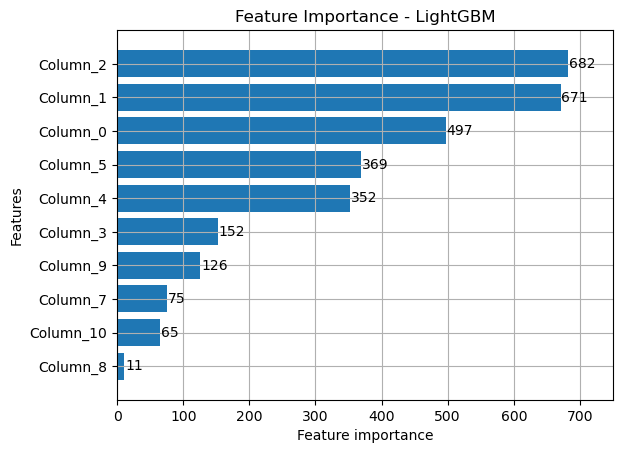

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("fraud.csv")

# Data Preprocessing
# Drop non-numeric features or features that are not useful
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# One-hot encoding for 'type' column
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Features (X) and Target (y)
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Standardize the features (important for LightGBM as well, even though it’s not sensitive to scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Initialize LightGBM Classifier
model = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    objective='binary',  # Binary classification for fraud detection
    metric='binary_error',  # Binary classification metric
    num_leaves=31,  # Number of leaves in one tree
    learning_rate=0.1,  # Learning rate
    n_estimators=100,  # Number of boosting rounds (trees)
    class_weight='balanced'  # Handle class imbalance
)

# Train the model
model.fit(X_train, y_train)

# Predict the labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation: Confusion Matrix, Classification Report, and ROC-AUC Score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Feature Importance Plot for LightGBM
lgb.plot_importance(model, max_num_features=10, importance_type='split', height=0.8)
plt.title('Feature Importance - LightGBM')
plt.show()

### CATBOOST

0:	total: 257ms	remaining: 4m 17s
200:	total: 10.9s	remaining: 43.4s
400:	total: 21.5s	remaining: 32.1s
600:	total: 32s	remaining: 21.2s
800:	total: 42.5s	remaining: 10.6s
999:	total: 53.1s	remaining: 0us
Confusion Matrix:
 [[314222      8]
 [    58    285]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.97      0.83      0.90       343

    accuracy                           1.00    314573
   macro avg       0.99      0.92      0.95    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score: 0.9962419265604505


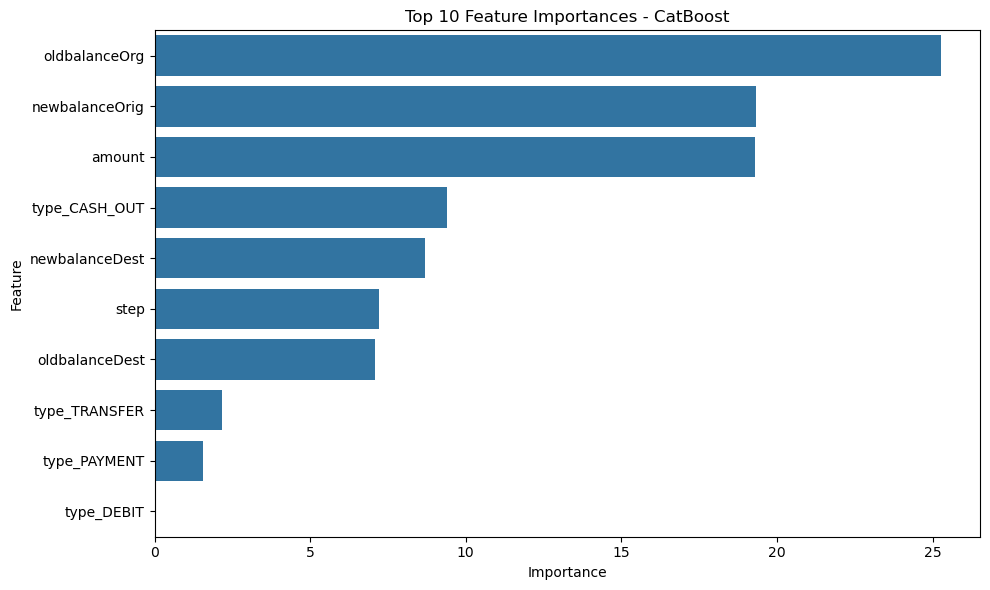

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool

data = pd.read_csv("fraud.csv")

# Drop ID columns that are not useful
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# One-hot encoding for 'type' column (optional for CatBoost, but kept here since you already encoded it)
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Separate features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Save original column names for feature importance plotting
feature_names = X.columns

# Standardize features (optional for CatBoost, but will be used here)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    scale_pos_weight=1,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=200,
    random_seed=42
)

# Train the model
model.fit(X_train, y_train)

# Predict class and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Get feature importances
importances = model.get_feature_importance()
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Feature Importances - CatBoost')
plt.tight_layout()
plt.show()

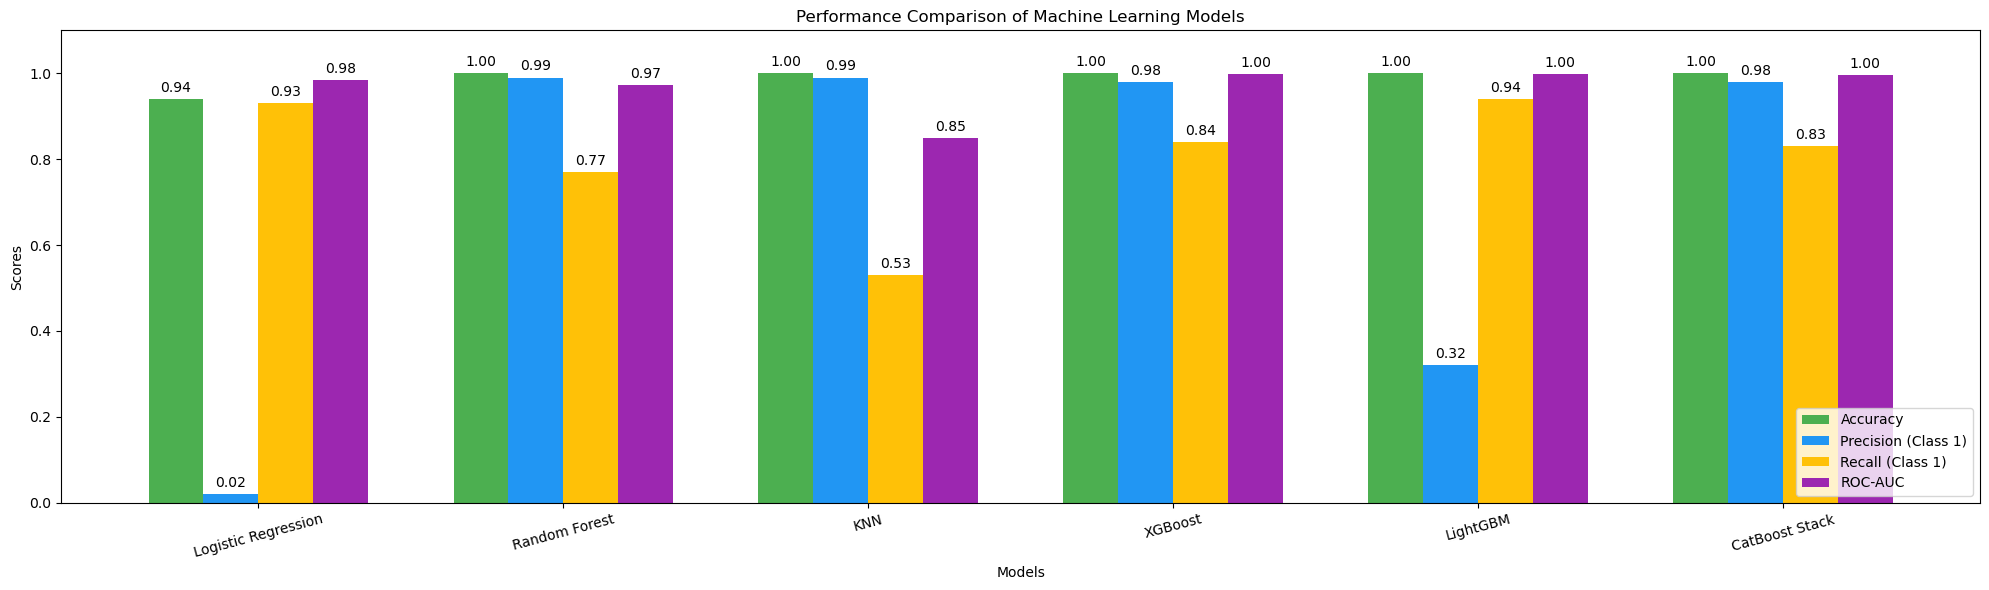

Model Performance Table:
              Model  Accuracy  Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)  ROC-AUC
Logistic Regression      0.94                 0.02              0.93                0.03   0.9847
      Random Forest      1.00                 0.99              0.77                0.87   0.9719
                KNN      1.00                 0.99              0.53                0.69   0.8482
            XGBoost      1.00                 0.98              0.84                0.90   0.9979
           LightGBM      1.00                 0.32              0.94                0.47   0.9977
     CatBoost Stack      1.00                 0.98              0.83                0.90   0.9964


In [13]:
import numpy as np
import pandas as pd

models = [
    'Logistic Regression',
    'Random Forest',
    'KNN',
    'XGBoost',
    'LightGBM',
    'CatBoost Stack'
]

accuracy = [
    0.94,  # Logistic Regression
    1.00,  # Random Forest
    1.00,  # KNN
    1.00,  # XGBoost
    1.00,  # LightGBM
    1.00   # CatBoost Stack
]

precision = [
    0.02,  # Logistic Regression
    0.99,  # Random Forest
    0.99,  # KNN
    0.98,  # XGBoost
    0.32,  # LightGBM
    0.98   # CatBoost Stack
]

recall = [
    0.93,  # Logistic Regression
    0.77,  # Random Forest
    0.53,  # KNN
    0.84,  # XGBoost
    0.94,  # LightGBM
    0.83   # CatBoost Stack
]

f1_score = [
    0.03,  # Logistic Regression
    0.87,  # Random Forest
    0.69,  # KNN
    0.90,  # XGBoost
    0.47,  # LightGBM
    0.90   # CatBoost Stack
]

roc_auc = [
    0.9847,  # Logistic Regression
    0.9719,  # Random Forest
    0.8482,  # KNN
    0.9979,  # XGBoost
    0.9977,  # LightGBM
    0.9964   # CatBoost Stack
]

# --------------------------
# Create DataFrame
# --------------------------
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision (Class 1)': precision,
    'Recall (Class 1)': recall,
    'F1-Score (Class 1)': f1_score,
    'ROC-AUC': roc_auc
})

# --------------------------
# Plotting Bar Graph
# --------------------------
x = np.arange(len(models))
width = 0.18

fig, ax = plt.subplots(figsize=(20, 6))

rects1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='#4CAF50')
rects2 = ax.bar(x - 0.5 * width, precision, width, label='Precision (Class 1)', color='#2196F3')
rects3 = ax.bar(x + 0.5 * width, recall, width, label='Recall (Class 1)', color='#FFC107')
rects4 = ax.bar(x + 1.5 * width, roc_auc, width, label='ROC-AUC', color='#9C27B0')

# Labels & title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Machine Learning Models')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0, 1.1)
ax.legend(loc='lower right')

# Add value labels on top
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout()
plt.show()

# --------------------------
# Print the Table
# --------------------------
print("Model Performance Table:")
print(df.to_string(index=False))

##### Recommended Winner:
##### If you're optimizing for both high fraud detection (recall) and low false positives (precision), then:

##### XGBoost or CatBoost Stack are your best bets.
##### Both offer excellent F1 and ROC-AUC with very solid precision.

### Catboost with SMOTE

Before SMOTE, class distribution in training set: isFraud
0    733203
1       799
Name: count, dtype: int64
After SMOTE, class distribution in training set: isFraud
0    733203
1    733203
Name: count, dtype: int64
0:	total: 280ms	remaining: 4m 40s
200:	total: 34.6s	remaining: 2m 17s
400:	total: 1m 5s	remaining: 1m 37s
600:	total: 1m 34s	remaining: 1m 3s
800:	total: 2m 2s	remaining: 30.5s
999:	total: 2m 29s	remaining: 0us
Confusion Matrix:
 [[313824    406]
 [    35    308]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.43      0.90      0.58       343

    accuracy                           1.00    314573
   macro avg       0.72      0.95      0.79    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score: 0.9924965455378963


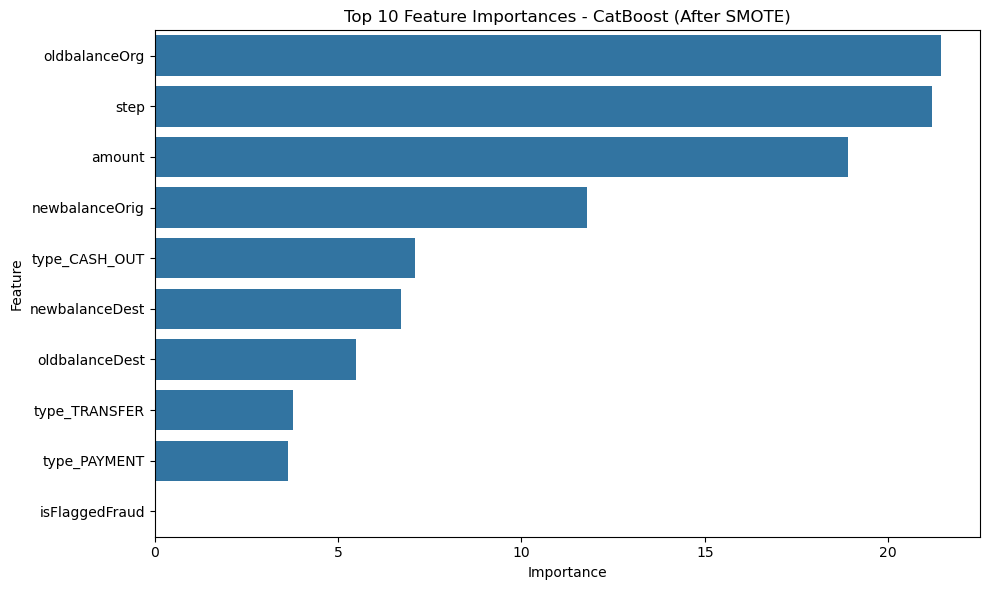

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE  # For SMOTE
from catboost import CatBoostClassifier, Pool

data = pd.read_csv("fraud.csv")

# Assuming you have already loaded your data into `data`
# Drop ID columns that are not useful
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# One-hot encoding for 'type' column (optional for CatBoost, but kept here since you already encoded it)
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# Separate features and target
X = data.drop('isFraud', axis=1)
y = data['isFraud']

# Save original column names for feature importance plotting
feature_names = X.columns

# Standardize features (optional for CatBoost, but will be used here)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# Apply SMOTE (Resampling)
# -------------------------------
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Before SMOTE, class distribution in training set: {y_train.value_counts()}")
print(f"After SMOTE, class distribution in training set: {pd.Series(y_train_resampled).value_counts()}")

# -------------------------------
# Train CatBoost Classifier
# -------------------------------
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    scale_pos_weight=1,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=200,
    random_seed=42
)

# Train the model on resampled data
model.fit(X_train_resampled, y_train_resampled)

# -------------------------------
# Evaluate the Model
# -------------------------------
# Predict class and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation Metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# -------------------------------
# Feature Importance Plot
# -------------------------------
# Get feature importances
importances = model.get_feature_importance()
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Feature Importances - CatBoost (After SMOTE)')
plt.tight_layout()
plt.show()

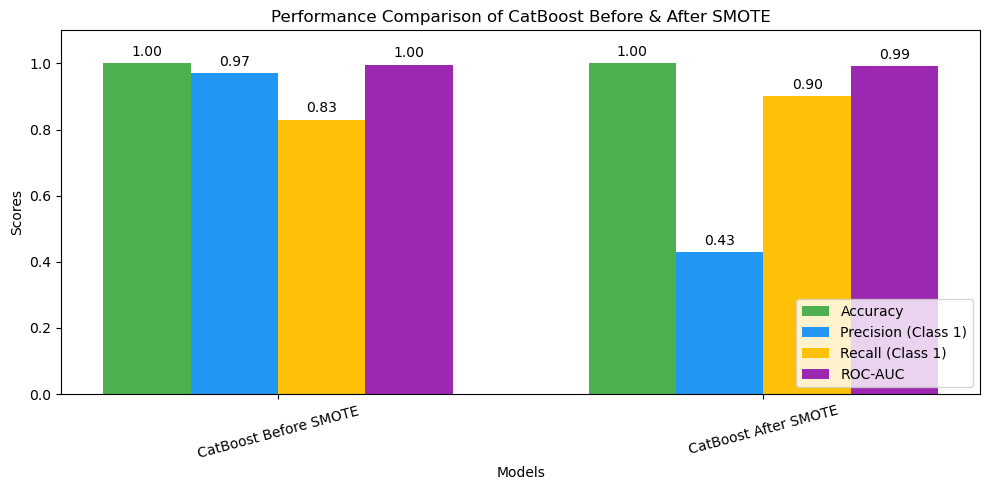

Model Performance Table (Before & After SMOTE):
                Model  Accuracy  Precision (Class 1)  Recall (Class 1)  F1-Score (Class 1)  ROC-AUC
CatBoost Before SMOTE       1.0                 0.97              0.83                0.90   0.9964
 CatBoost After SMOTE       1.0                 0.43              0.90                0.58   0.9920


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --------------------------
# Model Performance Data (Before and After SMOTE)
# --------------------------
models = [
    'CatBoost Before SMOTE',
    'CatBoost After SMOTE'
]

accuracy = [
    1.00,  # CatBoost Before SMOTE
    1.00   # CatBoost After SMOTE
]

precision = [
    0.97,  # CatBoost Before SMOTE
    0.43   # CatBoost After SMOTE
]

recall = [
    0.83,  # CatBoost Before SMOTE
    0.90   # CatBoost After SMOTE
]

f1_score = [
    0.90,  # CatBoost Before SMOTE
    0.58   # CatBoost After SMOTE
]

roc_auc = [
    0.9964,  # CatBoost Before SMOTE
    0.9920   # CatBoost After SMOTE
]

# --------------------------
# Create DataFrame
# --------------------------
df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision (Class 1)': precision,
    'Recall (Class 1)': recall,
    'F1-Score (Class 1)': f1_score,
    'ROC-AUC': roc_auc
})

# --------------------------
# Plotting Bar Graph
# --------------------------
x = np.arange(len(models))
width = 0.18

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='#4CAF50')
rects2 = ax.bar(x - 0.5 * width, precision, width, label='Precision (Class 1)', color='#2196F3')
rects3 = ax.bar(x + 0.5 * width, recall, width, label='Recall (Class 1)', color='#FFC107')
rects4 = ax.bar(x + 1.5 * width, roc_auc, width, label='ROC-AUC', color='#9C27B0')

# Labels & title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of CatBoost Before & After SMOTE')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15)
ax.set_ylim(0, 1.1)
ax.legend(loc='lower right')

# Add value labels on top
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

plt.tight_layout()
plt.show()

# --------------------------
# Print the Table
# --------------------------
print("Model Performance Table (Before & After SMOTE):")
print(df.to_string(index=False))

### *Conclusion* 
While applying SMOTE increased recall, it significantly lowered precision and F1-score, indicating a trade-off between detecting more frauds and introducing more false positives.

In [17]:
# -------------------------------
# Evaluate on Training Set
# -------------------------------
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]

print("Confusion Matrix (Training Set):\n", confusion_matrix(y_train, y_train_pred))
print("\nClassification Report (Training Set):\n", classification_report(y_train, y_train_pred))
print("ROC-AUC Score (Training Set):", roc_auc_score(y_train, y_train_prob))

# -------------------------------
# Evaluate on Test Set
# -------------------------------
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

print("\nConfusion Matrix (Test Set):\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))
print("ROC-AUC Score (Test Set):", roc_auc_score(y_test, y_test_prob))

Confusion Matrix (Training Set):
 [[732259    944]
 [    34    765]]

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    733203
           1       0.45      0.96      0.61       799

    accuracy                           1.00    734002
   macro avg       0.72      0.98      0.80    734002
weighted avg       1.00      1.00      1.00    734002

ROC-AUC Score (Training Set): 0.9992449300883854

Confusion Matrix (Test Set):
 [[313824    406]
 [    35    308]]

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.43      0.90      0.58       343

    accuracy                           1.00    314573
   macro avg       0.72      0.95      0.79    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score (Test Set): 0.9924965455378963


### Ensemble of XGBoost and CATBoost check

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from catboost import CatBoostClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("fraud.csv")
data = data.drop(['nameOrig', 'nameDest'], axis=1)
data = pd.get_dummies(data, columns=['type'], drop_first=True)

X = data.drop('isFraud', axis=1)
y = data['isFraud']
feature_names = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# Train CatBoost
# -------------------------------
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=0,
    random_seed=42
)
catboost_model.fit(X_train, y_train)

# -------------------------------
# Train XGBoost
# -------------------------------
xgboost_model = xgb.XGBClassifier(
    max_depth=6,
    n_estimators=100,
    learning_rate=0.1,
    scale_pos_weight=1,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)
xgboost_model.fit(X_train, y_train)

# -------------------------------
# Ensemble: Soft Voting
# -------------------------------
cat_prob = catboost_model.predict_proba(X_test)[:, 1]
xgb_prob = xgboost_model.predict_proba(X_test)[:, 1]
ensemble_prob = (cat_prob + xgb_prob) / 2
ensemble_pred = (ensemble_prob >= 0.5).astype(int)

# -------------------------------
# Evaluation
# -------------------------------
print("Confusion Matrix (Ensemble):\n", confusion_matrix(y_test, ensemble_pred))
print("\nClassification Report (Ensemble):\n", classification_report(y_test, ensemble_pred))
print("ROC-AUC Score (Ensemble):", roc_auc_score(y_test, ensemble_prob))

Confusion Matrix (Ensemble):
 [[314225      5]
 [    57    286]]

Classification Report (Ensemble):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.98      0.83      0.90       343

    accuracy                           1.00    314573
   macro avg       0.99      0.92      0.95    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score (Ensemble): 0.9975816584925212


0:	total: 116ms	remaining: 1m 55s
200:	total: 18.8s	remaining: 1m 14s
400:	total: 36.7s	remaining: 54.8s
600:	total: 54.1s	remaining: 35.9s
800:	total: 1m 11s	remaining: 17.8s
999:	total: 1m 29s	remaining: 0us
Confusion Matrix:
 [[314226      4]
 [    60    283]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    314230
           1       0.99      0.83      0.90       343

    accuracy                           1.00    314573
   macro avg       0.99      0.91      0.95    314573
weighted avg       1.00      1.00      1.00    314573

ROC-AUC Score: 0.9967613646537897


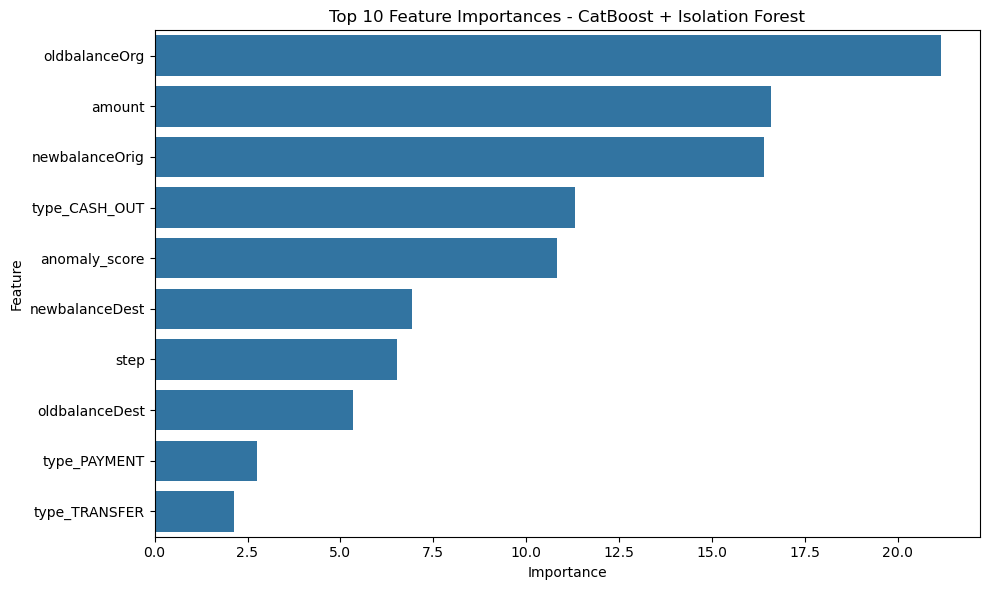

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier

data = pd.read_csv("fraud.csv")

# Drop ID columns that are not useful
data = data.drop(['nameOrig', 'nameDest'], axis=1)

# One-hot encoding for 'type' column (optional for CatBoost, but you already did it)
data = pd.get_dummies(data, columns=['type'], drop_first=True)

# -------------------------------
# Add Anomaly Scores from Isolation Forest
# -------------------------------
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fit only on the non-target features
X_unsupervised = data.drop('isFraud', axis=1)
iso_forest.fit(X_unsupervised)

# Add anomaly features
data['anomaly_score'] = iso_forest.decision_function(X_unsupervised)
data['anomaly_flag'] = iso_forest.predict(X_unsupervised)
# IsolationForest returns -1 for anomalies, convert to 1/0
data['anomaly_flag'] = data['anomaly_flag'].map({1: 0, -1: 1})

# -------------------------------
# Prepare Features and Target
# -------------------------------
X = data.drop('isFraud', axis=1)
y = data['isFraud']
feature_names = X.columns

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# Train CatBoost Classifier
# -------------------------------
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    scale_pos_weight=1,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=200,
    random_seed=42
)

model.fit(X_train, y_train)

# -------------------------------
# Evaluate the Model
# -------------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# -------------------------------
# Feature Importance Plot
# -------------------------------
importances = model.get_feature_importance()
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title('Top 10 Feature Importances - CatBoost + Isolation Forest')
plt.tight_layout()
plt.show()

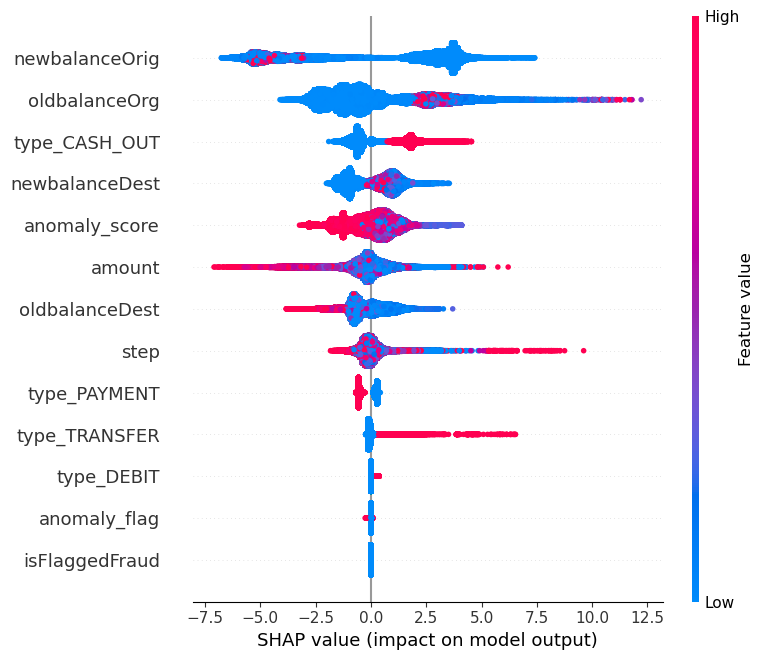

In [6]:
import shap

# Explain predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)